# 用pandas預測你的人生財務曲線

In [1]:
起始資金 = 20
每月薪水 = 5.5
每月開銷 = 2 # 不含房租
每月房租 = 1
退休年齡 = 65
預測時段 = range(30, 90, 1)

### 每年淨額 計算
每年淨額就是每年銀行帳戶的變化值，也就是當年的**總收入** - **總支出**
* 收入的部分有：薪水
* 支出的部分有：開銷、房租

同時必須考慮起始資金跟退休年齡！



In [2]:
#每年薪資成長 1.03
每月薪資=[]
每年薪資收入 =[]

for i in range(0,30):
    x=5.5
    每月薪資.append(x*(1.03)**i)

每年薪資收入=[]
for i in range(30, 90, 1):
    if i <60:
        每年薪資收入.append((每月薪資[i-30])*14)
    else:
        每年薪資收入.append(0)
print(每年薪資收入)   


[77.0, 79.31, 81.6893, 84.139979, 86.66417837, 89.26410372110001, 91.942026832733, 94.70028763771501, 97.54129626684646, 100.46753515485186, 103.48156120949741, 106.58600804578234, 109.7835882871558, 113.07709593577049, 116.46940881384361, 119.96349107825893, 123.56239581060669, 127.2692676849249, 131.08734571547265, 135.01996608693682, 139.07056506954495, 143.2426820216313, 147.53996248228023, 151.96616135674864, 156.5251461974511, 161.22090058337463, 166.05752760087591, 171.03925342890219, 176.17043103176923, 181.45554396272232, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


<AxesSubplot:>

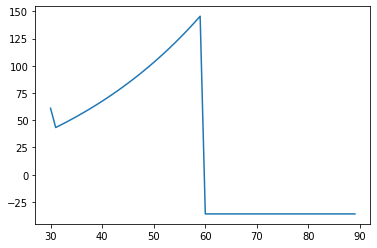

In [3]:
import pandas as pd
import matplot

# 每年淨額
每年淨額 = pd.Series(0, index=預測時段)
每年淨收入=pd.Series(每年薪資收入,index=預測時段)
每年淨額.iloc[0] = 起始資金
每年淨額.loc[:退休年齡] += 每年淨收入.loc[:退休年齡]
每年淨額 -= (每月開銷 + 每月房租) * 12

%matplotlib inline
每年淨額.plot()

### 沒有投資的總資產變化情況

<AxesSubplot:>

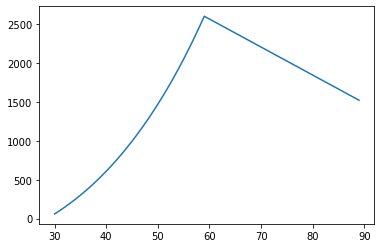

In [4]:
# 無投資總資產

無投資總資產 = 每年淨額.cumsum()
無投資總資產.plot()

### 有投資的總資產變化情況

每年，我們都審視前年的帳戶，將資金分成兩份
* 投資金額 = 總帳戶金額 * 投資部位
* 存在帳戶裡不動錢 = 總帳戶金額 * (1 - 投資部位)

所以今年底的帳戶餘額 = 投資金額 * 投資年利率 + 存在帳戶裡不動的錢 + 今年淨額

於是我們可以寫一個函式代表每年的資產增加變化：

<AxesSubplot:>

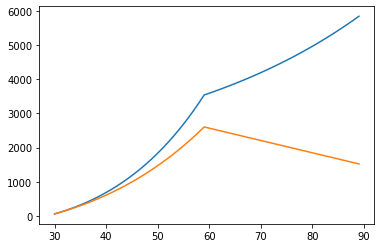

In [5]:
投資部位 = 0.5
投資年利率 = 5 # 跟影片中不太一樣，影片中：1.05，改成 5% 來表示，比較好理解，也就是一年有5％的報酬率

def compound_interest(arr, ratio, return_rate):
    ret = [arr.iloc[0]]
    for v in arr[1:]:
        ret.append(ret[-1] * ratio * (return_rate/100+1) + ret[-1] * (1 - ratio) + v)
    return pd.Series(ret, 預測時段)

投資總資產 = compound_interest(每年淨額, 投資部位, 投資年利率)
投資總資產.plot()
無投資總資產.plot()

# 考慮買房的話
* 假設買房總共要花「買房價格」
* 然後一開始，我們會付「買房頭期款」
* 在到達「買房年紀」以前，先租房；從「買房年紀」以後，就是負貸款
* 設定「貸款年數」，設定究竟想要貸款幾年
* 貸款就得付「房貸利率」（％）！

In [6]:
買房價格 = 300
買房頭期款 = 100
買房年紀 = 35
房貸利率 = 3
貸款年數 = 20

# 先計算每年的買房花費

<AxesSubplot:>

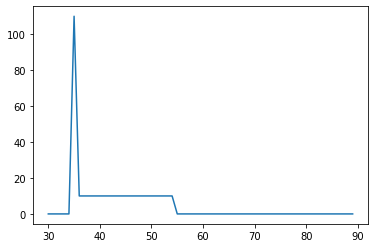

In [7]:
買房花費 = pd.Series(0, index=預測時段)
買房花費[買房年紀] = 買房頭期款
買房花費.loc[買房年紀:買房年紀+貸款年數-1] += (買房價格 - 買房頭期款) / 貸款年數
買房花費.plot()

# 接下來計算貸款的利息

<AxesSubplot:>

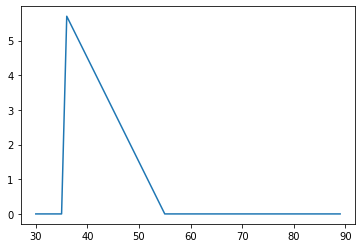

In [8]:
# 先計算有多少欠款
欠款 = pd.Series(0, index=預測時段)
欠款[買房年紀] = 買房價格
欠款 = 欠款.cumsum()
欠款 = 欠款 - 買房花費.cumsum()
#欠款.plot()
#
利息 = 欠款.shift().fillna(0) * 房貸利率 / 100
利息.plot()

# 計算繳房租

<AxesSubplot:>

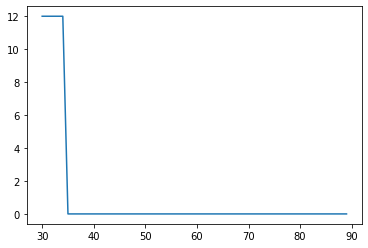

In [9]:
房租年繳 = pd.Series(每月房租*12, index=預測時段)
房租年繳.loc[買房年紀:] = 0
房租年繳.plot()

<AxesSubplot:>

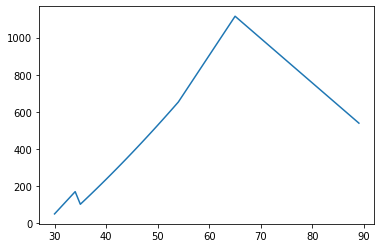

In [10]:
每年淨額_買房 = pd.Series(0, index=預測時段)
每年淨額_買房.iloc[0] = 起始資金
每年淨額_買房.loc[:退休年齡] += 每月薪水 * 12
每年淨額_買房 -= (每月開銷*12 + 房租年繳 + 利息 + 買房花費)
每年淨額_買房.cumsum().plot()
#每年淨額_買房.plot()

<AxesSubplot:>

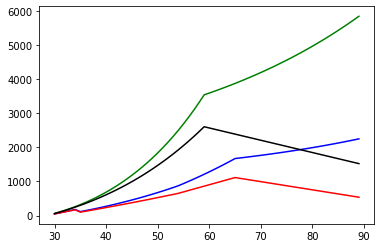

In [11]:
投資_買房_總資產 = compound_interest(每年淨額_買房, 投資部位, 投資年利率)
#
投資總資產.plot(color='green')
投資_買房_總資產.plot(color='blue')
每年淨額_買房.cumsum().plot(color='red')
無投資總資產.plot(color='black')

[77.0, 79.31, 81.6893, 84.139979, 86.66417837, 89.26410372110001, 91.942026832733, 94.70028763771501, 97.54129626684646, 100.46753515485186, 103.48156120949741, 106.58600804578234, 109.7835882871558, 113.07709593577049, 116.46940881384361, 119.96349107825893, 123.56239581060669, 127.2692676849249, 131.08734571547265, 135.01996608693682, 139.07056506954495, 143.2426820216313, 147.53996248228023, 151.96616135674864, 156.5251461974511, 161.22090058337463, 166.05752760087591, 171.03925342890219, 176.17043103176923, 181.45554396272232, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


<AxesSubplot:>

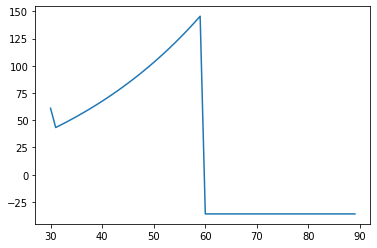

In [12]:
#用年收與年花費來算
起始年紀=30
起始薪水 =5.5
預測時段 = range(起始年紀, 90)
# 每年淨額 = pd.Series(0, index=預測時段)
每月薪資=[]
每年薪資收入 =[]
 
for i in range(0,起始年紀):
    x=起始薪水
    每月薪資.append(x*(1.03)**i)

每年薪資收入=[]
for i in range(起始年紀, 90, 1):
    if i <60:
        每年薪資收入.append((每月薪資[i-30])*14)
    else:
        每年薪資收入.append(0)
print(每年薪資收入)   

# 每年淨額
每年淨額 = pd.Series(0, index=預測時段)
每年淨收入=pd.Series(每年薪資收入,index=預測時段)
每年淨額.iloc[0] = 起始資金
每年淨額.loc[:退休年齡] += 每年淨收入.loc[:退休年齡]
每年淨額 -= (每月開銷 + 每月房租) * 12

%matplotlib inline
每年淨額.plot()

In [13]:
## def year_incomes(起始資金 ,起始年紀,
#     每月薪水 ,
#     起始薪水 ,
#     每月開銷 ,
#     每月房租 ,
#     退休年齡 ,
#     投資部位,
#     投資年利率,
#     買房價格,
#     買房頭期款,
#     買房年紀,
#     房貸利率,
#     貸款年數,):
    
#     每年薪資收入=[]
#     每年開銷=[]
#     預測時段 = range(起始年紀, 100)
#     每年淨額 = pd.Series(0, index=預測時段)
    
#     for i in range(起始年紀,退休年齡):
        
def asset_prediction(起始資金 ,起始年紀,薪資成長,
    每月薪水 ,
    每月開銷 ,
    每月房租 ,
    退休年齡 ,
    投資部位,
    投資年利率,
    買房價格,
    買房頭期款,
    買房年紀,
    房貸利率,
    貸款年數,):

    每月薪資=[]
    每年薪資收入 =[]

    for i in range(0,起始年紀):
        x=每月薪水
        每月薪資.append(x*(1+薪資成長)**i)

    每年薪資收入=[]
    for i in range(起始年紀, 90, 1):
        if i <60:
            每年薪資收入.append((每月薪資[i-30])*12)
        else:
            每年薪資收入.append(0)
    print(每年薪資收入)   

    # 每年淨額
    每年淨額 = pd.Series(0, index=預測時段)
    每年淨收入=pd.Series(每年薪資收入,index=預測時段)
    每年淨額.iloc[0] = 起始資金
    每年淨額.loc[:退休年齡] += 每年淨收入.loc[:退休年齡]
    每年淨額 -= (每月開銷 + 每月房租) * 12
    
    
    def compound_interest(arr, ratio, return_rate):
        ret = [arr.iloc[0]]
        for v in arr[1:]:
            ret.append(ret[-1] * ratio * (return_rate/100 + 1) + ret[-1] * (1 - ratio) + v)
        return pd.Series(ret, 預測時段)
    
    買房花費 = pd.Series(0, index=預測時段)
    買房花費[買房年紀] = 買房頭期款
    買房花費.loc[買房年紀:買房年紀+貸款年數-1] += (買房價格 - 買房頭期款) / 貸款年數
    
    欠款 = pd.Series(0, index=預測時段)
    欠款[買房年紀] = 買房價格
    欠款 = 欠款.cumsum()
    欠款 = 欠款 - 買房花費.cumsum()
    利息 = 欠款.shift().fillna(0) * 房貸利率 / 100


    房租年繳 = pd.Series(每月房租*12, index=預測時段)
    房租年繳.loc[買房年紀:] = 0
    
    每年淨額_買房 = pd.Series(0, index=預測時段)
    每年淨額_買房.iloc[0] = 起始資金
    每年淨額_買房.loc[:退休年齡] += 每年淨收入
    每年淨額_買房 -= (每月開銷*12 + 房租年繳 + 利息 + 買房花費)
    
    
    
    pd.DataFrame({
        'no invest, no house': 每年淨額.cumsum(),
        'invest, no house': compound_interest(每年淨額, 投資部位, 投資年利率),
        'no invest, house': 每年淨額_買房.cumsum(),
        'invest, house': compound_interest(每年淨額_買房, 投資部位, 投資年利率),
        
    }).plot()

    
    import matplotlib.pylab as plt
    plt.ylim(0, 5000)
    
    print('月繳房貸', (買房價格 - 買房頭期款) / 貸款年數 / 12)
    print('利息', 利息.sum() / 貸款年數)
    print('')

import ipywidgets as widgets
widgets.interact(asset_prediction, 
    起始資金=widgets.FloatSlider(min=0, max=100, step=10, value=20),
    薪資成長=widgets.FloatSlider(min=0, max=1, step=0.01, value=0.03),
    起始年紀=widgets.IntSlider(min=0, max=80, step=1, value=30),
    每月薪水=widgets.FloatSlider(min=0, max=20, step=0.1, value=3),
    每月開銷=widgets.FloatSlider(min=0, max=20, step=0.2, value=1),
    每月房租=widgets.FloatSlider(min=0, max=20, step=0.5, value=1),
    退休年齡=widgets.IntSlider(min=0, max=80, step=1, value=60),
    投資部位=widgets.FloatSlider(min=0, max=1, step=0.1, value=0.7),
    投資年利率=widgets.FloatSlider(min=0, max=20, step=0.5, value=5),
    買房價格=widgets.IntSlider(min=100, max=2000, step=50, value=300),
    買房頭期款=widgets.IntSlider(min=100, max=2000, step=50, value=100),
    買房年紀=widgets.IntSlider(min=20, max=80, step=1, value=40),
    房貸利率=widgets.FloatSlider(min=1, max=5, step=0.1, value=2.4),
    貸款年數=widgets.IntSlider(min=0, max=40, step=1, value=20)
)

interactive(children=(FloatSlider(value=20.0, description='起始資金', step=10.0), IntSlider(value=30, description=…

<function __main__.asset_prediction(起始資金, 起始年紀, 薪資成長, 每月薪水, 每月開銷, 每月房租, 退休年齡, 投資部位, 投資年利率, 買房價格, 買房頭期款, 買房年紀, 房貸利率, 貸款年數)>

In [14]:
import pandas as pd
import random
%matplotlib inline


        


def asset_prediction(起始資金 ,起始年紀,
    每月薪水 ,
    起始薪水 ,
    每月開銷 ,
    每月房租 ,
    退休年齡 ,
    投資部位,
    投資年利率,
    買房價格,
    買房頭期款,
    買房年紀,
    房貸利率,
    貸款年數,):

    預測時段 = range(起始年紀, 100)
    每年淨額 = pd.Series(0, index=預測時段)
    每年淨額.iloc[0] = 起始資金
    每年淨額.loc[:退休年齡] += 每月薪水 * 12
    
    
    #每年淨收入=pd.Series(每年薪資收入,index=預測時段)
    #每年淨額.iloc[0] = 起始資金
    #每年淨額.loc[:退休年齡] += 每年淨收入.loc[:退休年齡]
    #每年淨額 -= (每月開銷 + 每月房租) * 12
    每年淨額 -= (每月開銷 + 每月房租) * 12
    
    
    def compound_interest(arr, ratio, return_rate):
        ret = [arr.iloc[0]]
        for v in arr[1:]:
            ret.append(ret[-1] * ratio * (return_rate/100 + 1) + ret[-1] * (1 - ratio) + v)
        return pd.Series(ret, 預測時段)
    
    買房花費 = pd.Series(0, index=預測時段)
    買房花費[買房年紀] = 買房頭期款
    買房花費.loc[買房年紀:買房年紀+貸款年數-1] += (買房價格 - 買房頭期款) / 貸款年數
    
    欠款 = pd.Series(0, index=預測時段)
    欠款[買房年紀] = 買房價格
    欠款 = 欠款.cumsum()
    欠款 = 欠款 - 買房花費.cumsum()
    利息 = 欠款.shift().fillna(0) * 房貸利率 / 100


    房租年繳 = pd.Series(每月房租*12, index=預測時段)
    房租年繳.loc[買房年紀:] = 0
    
    每年淨額_買房 = pd.Series(0, index=預測時段)
    每年淨額_買房.iloc[0] = 起始資金
    每年淨額_買房.loc[:退休年齡] += 每月薪水 * 12
    每年淨額_買房 -= (每月開銷*12 + 房租年繳 + 利息 + 買房花費)
    
    
    
    pd.DataFrame({
        'no invest, no house': 每年淨額.cumsum(),
        'invest, no house': compound_interest(每年淨額, 投資部位, 投資年利率),
        'no invest, house': 每年淨額_買房.cumsum(),
        'invest, house': compound_interest(每年淨額_買房, 投資部位, 投資年利率),
        
    }).plot()

    
    import matplotlib.pylab as plt
    plt.ylim(0, 2000)
    
    print('月繳房貸', (買房價格 - 買房頭期款) / 貸款年數 / 12)
    print('利息', 利息.sum() / 貸款年數)
    print('')

import ipywidgets as widgets
widgets.interact(asset_prediction, 
    起始資金=widgets.FloatSlider(min=0, max=100, step=10, value=20),
    起始年紀=widgets.IntSlider(min=0, max=80, step=1, value=30),
    每月薪水=widgets.FloatSlider(min=0, max=20, step=0.1, value=3),
    每月開銷=widgets.FloatSlider(min=0, max=20, step=0.2, value=1),
    每月房租=widgets.FloatSlider(min=0, max=20, step=0.5, value=1),
    退休年齡=widgets.IntSlider(min=0, max=80, step=1, value=60),
    投資部位=widgets.FloatSlider(min=0, max=1, step=0.1, value=0.7),
    投資年利率=widgets.FloatSlider(min=0, max=20, step=0.5, value=5),
    買房價格=widgets.IntSlider(min=100, max=2000, step=50, value=300),
    買房頭期款=widgets.IntSlider(min=100, max=2000, step=50, value=100),
    買房年紀=widgets.IntSlider(min=20, max=80, step=1, value=40),
    房貸利率=widgets.FloatSlider(min=1, max=5, step=0.1, value=2.4),
    貸款年數=widgets.IntSlider(min=0, max=40, step=1, value=20)
)

ValueError: cannot find widget or abbreviation for argument: '起始薪水'

### 結論

1. 絕對要開始投資，讓資產報酬率在每年5％就差很多了！
2. 買不買房差很大！
3. 投資部位很重要